# Different configurations using homeostasis with Kmeans

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
import pickle
from mix_Network import *
from Event import Event
import ipywidgets

In [3]:
def EuclidianNorm(hist1,hist2):
    return np.linalg.norm(hist1-hist2)

def NormalizedNorm(hist1,hist2):
    hist1/=np.sum(hist1)
    hist2/=np.sum(hist2)
    return np.linalg.norm(hist1-hist2)/(np.linalg.norm(hist1)*np.linalg.norm(hist2))

def BattachaNorm(hist1, hist2):
    hist1/=np.sum(hist1)
    hist2/=np.sum(hist2)
    return -np.log(np.sum(np.sqrt(hist1*hist2)))

def accuracy(trainmap,testmap,measure):
    accuracy=0
    total = 0
    for i in range(len(testmap)):
        dist = np.zeros([len(trainmap)])
        for k in range(len(trainmap)):
            if measure=='bhatta':
                dist[k] = BattachaNorm(testmap[i][1],trainmap[k][1])
            elif measure=='eucli':
                dist[k] = EuclidianNorm(testmap[i][1],trainmap[k][1])
            elif measure=='norm':
                dist[k] = NormalizedNorm(testmap[i][1],trainmap[k][1])
        if testmap[i][0]==trainmap[np.argmin(dist)][0]:
            accuracy+=1
        total+=1
    return accuracy/total

# Test of homeostasis rule on Lagorce 2017 results

In [4]:
homhots = network(algo='lagorce', krnlinit='first', tau=20, homeo=True)
homhots.learninglagorce(diginit=True)

100%|██████████| 223371/223371 [03:33<00:00, 1048.60it/s]


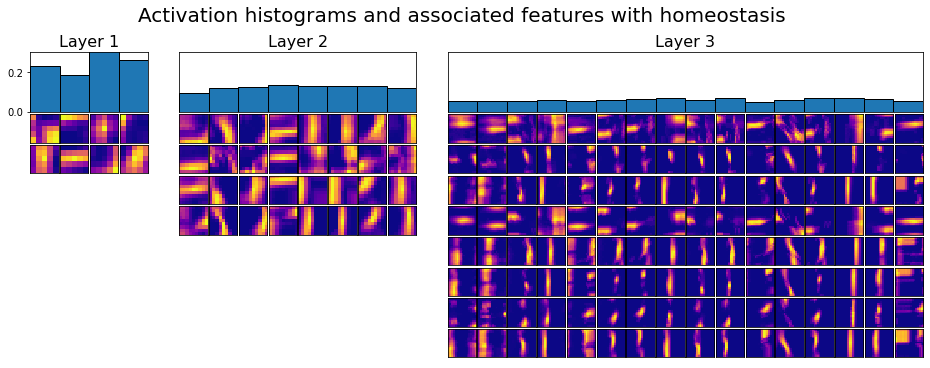

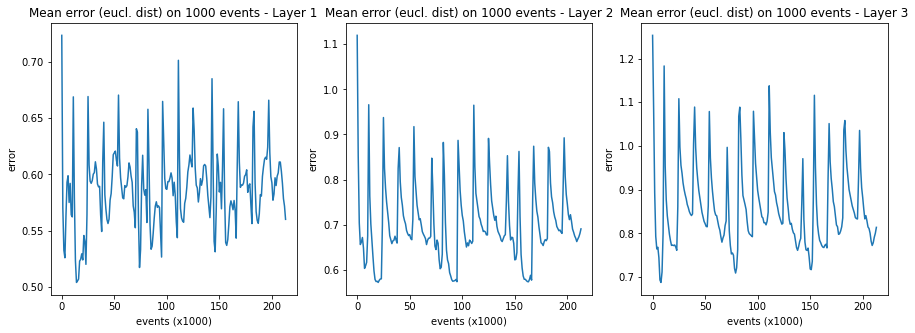

In [5]:
homhots.plotlayer()
homhots.plotconv()

In [ ]:
trainmap = homhots.traininglagorce()
testmap = homhots.testinglagorce()
score1=accuracy(trainmap,testmap,'bhatta')
score2=accuracy(trainmap,testmap,'eucli')
score3=accuracy(trainmap,testmap,'norm')
print('bhatta:'+str(score1*100)+'% - '+'eucli:'+str(score2*100)+'% - '+'norm:'+str(score3*100)+'%')

Classification is improving with euclidian distance

In [ ]:
## Loading and filter an image of a 8
camsize = [32,32]
event0 = Event(ImageSize=(camsize[0], camsize[1]))
event0.LoadFromMat("../Data/alphabet_ExtractedStabilized.mat", image_number=22)
for i in range(len(homhots.L)):
    homhots.TS[i].spatpmat[:] = 0
    homhots.TS[i].iev = 0
    homhots.stats[i].actmap = np.zeros([len(homhots.L[i].cumhisto),camsize[0],camsize[1]])
    
count = 0
nbevent = int(event_sgl.time.shape[0])
pbar = tqdm(total=nbevent)
while count<nbevent:
    pbar.update(1)
    homhots.run(event0.address[count,1],event0.address[count,0],event0.time[count], event0.polarity[count], to_record=True)
    count += 1       
pbar.close()

In [ ]:
homhots.plotactiv()

# Test of homeostasis rule on Maro 2020 results

In [ ]:
homaro = network(algo='lagorce', krnlinit='rdn', homeo=True)
homaro.learninglagorce()